In [1]:
import xlrd
xlsfile = "data.xlsx"
book = xlrd.open_workbook(xlsfile)
table = book.sheet_by_index(0)
nrows = table.nrows
ncols = table.ncols
print("The table all row is %d,col is %s" %(nrows,ncols))

The table all row is 93845,col is 3


In [2]:
data = [[],[],[]]
for i in range(nrows):
    data[0].append(xlrd.xldate.xldate_as_datetime(table.cell(i,0).value, 0))
    data[1].append(table.cell(i,1).value)
    data[2].append(table.cell(i,2).value)

In [3]:
import datetime
datestart = data[0][0]
for i in range(nrows):
    data[0][i] = data[0][i] - datestart +datetime.timedelta(days=1)
    data[0][i] = data[0][i].days

In [4]:
flag = [0]
for i in range(nrows-1):
    if data[0][i+1] - data[0][i] != 0:
        flag.append(i+1)
flag.append(nrows)

In [5]:
import numpy as np
from scipy import interpolate
import pylab as pl

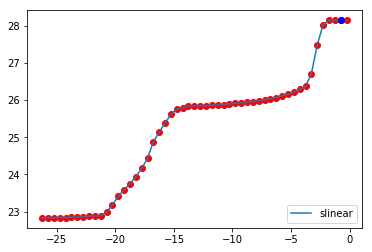

In [8]:
'''ynew = [[],[]]
for i in range(len(flag)-1):  
#for i in (0,):
    a = flag[i]
    b = flag[i+1]
    x = data[1][a:b]
    y = data[2][a:b]
    ynew[0].append(a+1) 
    delta_x_d = x[0] - 0.5
    delta_x_p = x[0] + 0.5
    if delta_x_d >= min(x):
        delta_x = delta_x_d
        f = interpolate.interp1d(x,y,kind="slinear")
        ynew[1].append(f(delta_x))
    elif delta_x_p <= max(x):
        delta_x = delta_x_p
        f = interpolate.interp1d(x,y,kind="slinear")
        ynew[1].append(f(delta_x))
    else:
        ynew[1].append(y[-1])
'''

#for i in range(len(flag)-1):  
for i in (191,):
    a = flag[i]
    b = flag[i+1]
    y = data[1][a:b]
    x = data[2][a:b]
    delta_x_d = x[0] - 0.5
    delta_x_p = x[0] + 0.5
    if delta_x_d >= min(x):
        delta_x = delta_x_d
        f = interpolate.interp1d(x,y,kind="slinear")
        ynew = f(delta_x)
    elif delta_x_p <= max(x):
        delta_x = delta_x_p
        f = interpolate.interp1d(x,y,kind="slinear")
        ynew = f(delta_x)
    else:
        ynew = y[-1]
    
    f = interpolate.interp1d(x,y,kind="slinear")
    ynew = f(x)
    pl.plot(x,y,"ro")
    pl.plot(x,ynew,label=str("slinear"))
    pl.plot(delta_x,f(delta_x_d),"bo")
    pl.legend(loc="lower right")
    pl.show()


In [7]:
for i in range(len(ynew[1])):
    ynew[1][i] = float(ynew[1][i])
for i in range(len(ynew[0])):
    ynew[0][i] = datestart + datetime.timedelta(days=data[0][ynew[0][i]]-1)
    ynew[0][i] = ynew[0][i].strftime('%F')
    import xlwt
book = xlwt.Workbook(encoding='utf-8', style_compression=0)
sheet = book.add_sheet('test', cell_overwrite_ok=True)
for i in range(len(ynew[0])):
    sheet.write(i, 0,ynew[0][i])
for j in range(len(ynew[1])):
    sheet.write(j, 1,ynew[1][j])
book.save(r'test1.xls')
print('good')